In [1]:
from TT_utilities import Case, timeit
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
RECORD_DIRS = list(Path("./Data").glob("*p00*"))
CASES = list()
for record_dir in RECORD_DIRS:
    record_name = re.search("p[0-9]{6}", str(record_dir))[0]
    c = Case(record_dir.joinpath(record_name))
    break
    CASES.append(c)

In [3]:
@timeit
def get_NL(c):
    c.process("nonlinear")
    c.plot()

for c in CASES:
    print(c)
    c.process("nonlinear")
    c.plotProcess("nonlinear")

In [4]:
c.process("nonlinear")

 > Optimal signal found is 'II', present in 5/5
raw_signal:  1686415   raw_peaks:  30995
Function _non_linear_analysis_r execution time: 10.60's
raw_signal:  3317   raw_peaks:  62
Function _non_linear_analysis_r execution time: 0.00's
raw_signal:  1834183   raw_peaks:  32716
Function _non_linear_analysis_r execution time: 10.58's
raw_signal:  5137500   raw_peaks:  88324
Function _non_linear_analysis_r execution time: 30.50's
raw_signal:  645000   raw_peaks:  10683
Function _non_linear_analysis_r execution time: 3.16's
Function _non_linear_analysis_c execution time: 54.85's


In [5]:
for r in c.nl_sig:
    for k, v in r.N_LINEAR.items():
        print(f"\n{k}: ", v[:5])
    print()


app_ent:  [1.050715671851798, 1.0583537778490206, 1.0529870792675058, 1.061644572411368, 1.0723120536089148]

samp_ent:  [0.9606050071722426, 0.9727496267698147, 0.9703615377849631, 0.9776588437432403, 0.9881599057942991]

hfd:  [2.0833305734787197, 2.0849468885531097, 2.0847494597619267, 2.082936783880055, 2.081454350791992]

dfa:  [0.2336533401959966, 0.242038612519927, 0.24166669333082647, 0.23284292408964566, 0.24671309301860886]

poin:  [0.6067672277004736, 0.6044210171232167, 0.6016755078291577, 0.5981052566620434, 0.6016616500640827]


app_ent:  [1.056700224001251, 1.0567772513421323, 1.0654574420046221, 1.0687060339158196, 1.076183033049841]

samp_ent:  [0.9585371012457522, 0.9724226495272714, 0.9694755386302317, 0.9716445978741242, 0.9764745648477526]

hfd:  [2.0796447013298582, 2.0812855081132855, 2.08010494044992, 2.078293601966233, 2.0796300279748574]

dfa:  [0.28497214456777187, 0.24942587072155561, 0.25569242679705007, 0.25806616648280284, 0.25977859270712195]

poin:  [0

In [7]:
c = CASES[1]
for r in c.nl_sig:
    print(f"\nRecord {r.name}")
    for k, v in r.N_LINEAR.items():
        print(f"\t{k} data has length of: {len(v)}")


Record 3612801_0008
	app_ent data has length of: 574
	samp_ent data has length of: 574
	hfd data has length of: 574
	dfa data has length of: 574

Record 3612801_0017
	app_ent data has length of: 202
	samp_ent data has length of: 202
	hfd data has length of: 202
	dfa data has length of: 202

Record 3612801_0020
	app_ent data has length of: 126
	samp_ent data has length of: 126
	hfd data has length of: 126
	dfa data has length of: 126

Record 3612801_0022
	app_ent data has length of: 292
	samp_ent data has length of: 292
	hfd data has length of: 292
	dfa data has length of: 292


In [3]:
def smoother(array, window=5, pad=True, repeat=1):
    """
    Regresa un vector de la misma longitud que el introducido, dependiendo
    del valor de la ventana ajusta los extremos al promedio de los valores
    que puede ocupar.
    
    ó, si pad = False
    Regresa sólo el vector promediado con los (window-1) datos en los ext-
    tremos acortados.
    
    VALOR MÍNIMO DE VENTANA ES 3
    """
    for i in range(repeat):
        serie = pd.Series(array)
        data = list(serie.rolling(window=window).mean())
        numb = sum(np.isnan(data)*1)
        if not pad:
            return data[numb:]
        lower, upper = int(np.ceil(numb/2)), int(np.floor(numb/2))
        ini = [np.mean(array[:i+upper]) for i in range(lower)]
        end = [np.mean(array[(len(array)-(lower+i)):]) for i in range(upper)]
        array = np.array(ini+data[numb:]+end)
    return array

### RR LECTURE

#### SCIPY PEAK DETECTION



In [19]:
from wfdb import gqrs_detect
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, iirnotch, filtfilt

from wfdb import processing

In [60]:
len(CASES)

6

In [65]:
fs = CASES[5][0].fs
signal = CASES[5][0]["II"][:1000]
x_data = np.arange(len(signal))/fs
MAX_BPM = 220

In [66]:
CASES[5].pathology

'congestive_heartfailure'

IndexError: arrays used as indices must be of integer (or boolean) type

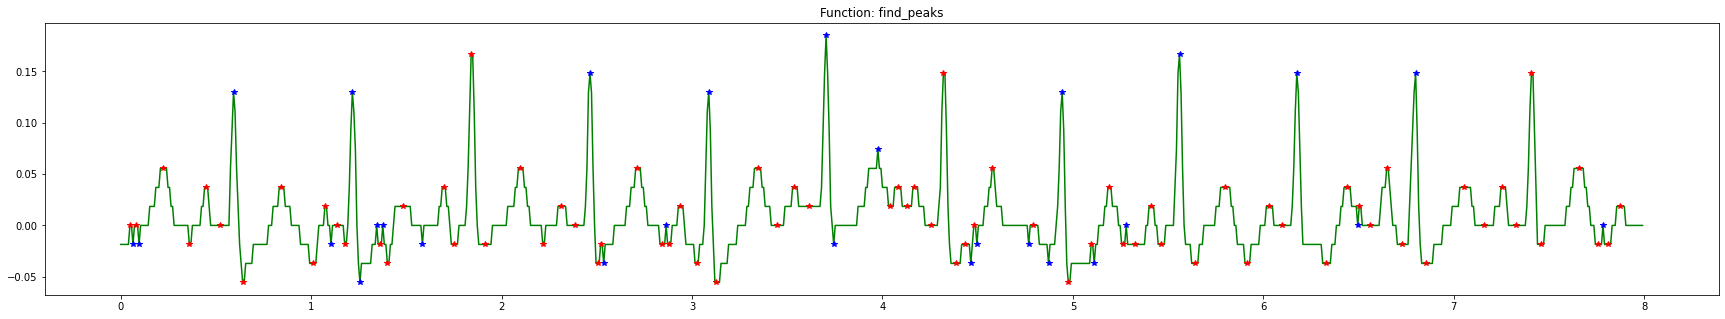

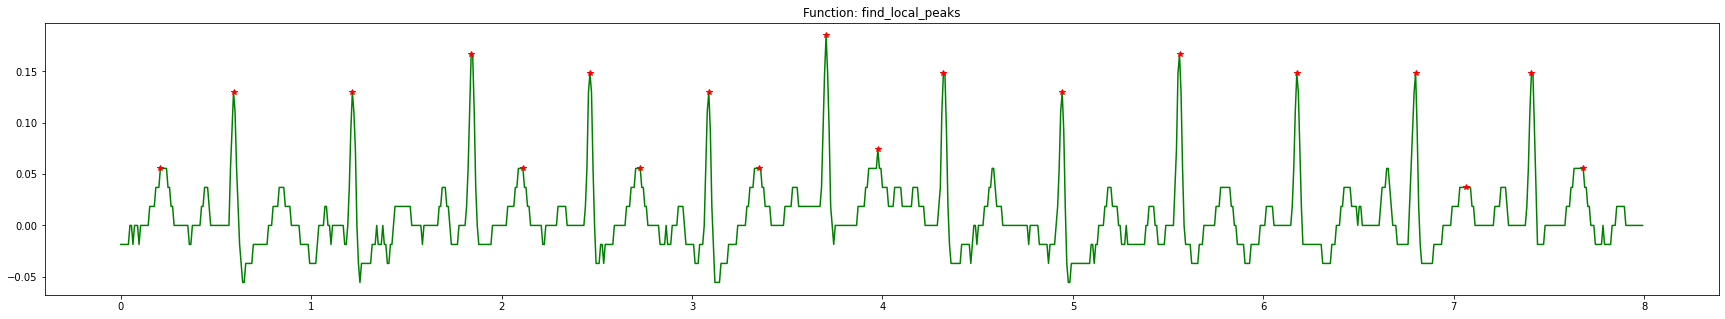

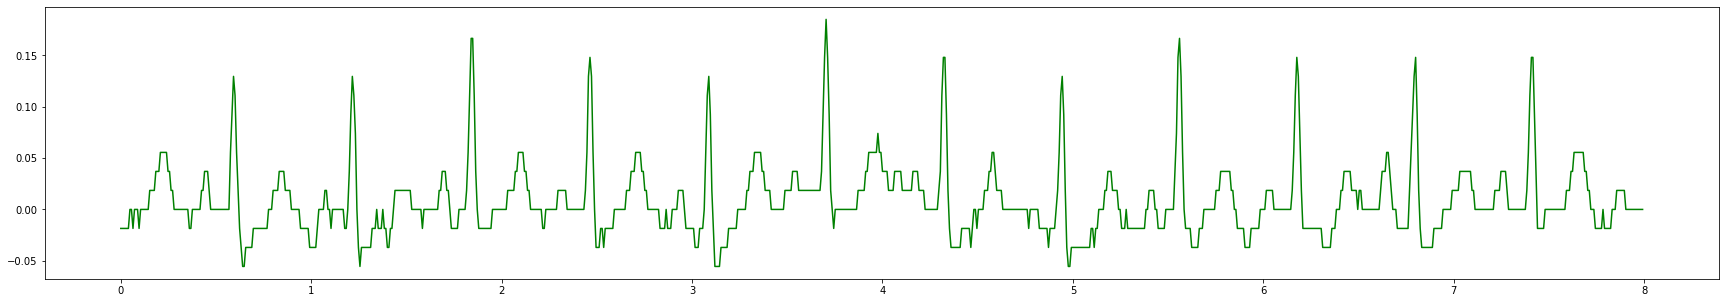

In [67]:
a, b = processing.find_peaks(signal)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*b")
plt.plot(x_data[b], signal[b], "*r")
plt.title("Function: find_peaks")

a = processing.find_local_peaks(signal, int(fs/4))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: find_local_peaks")

a = processing.gqrs_detect(signal, fs)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: gqrs_detect")

a, b = find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*r")
plt.title("Function: scipy.find_peaks")

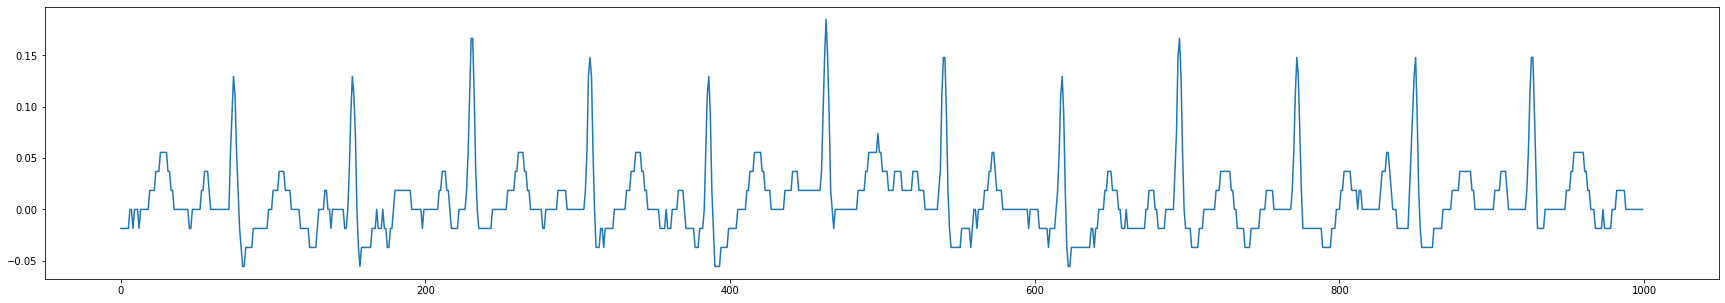

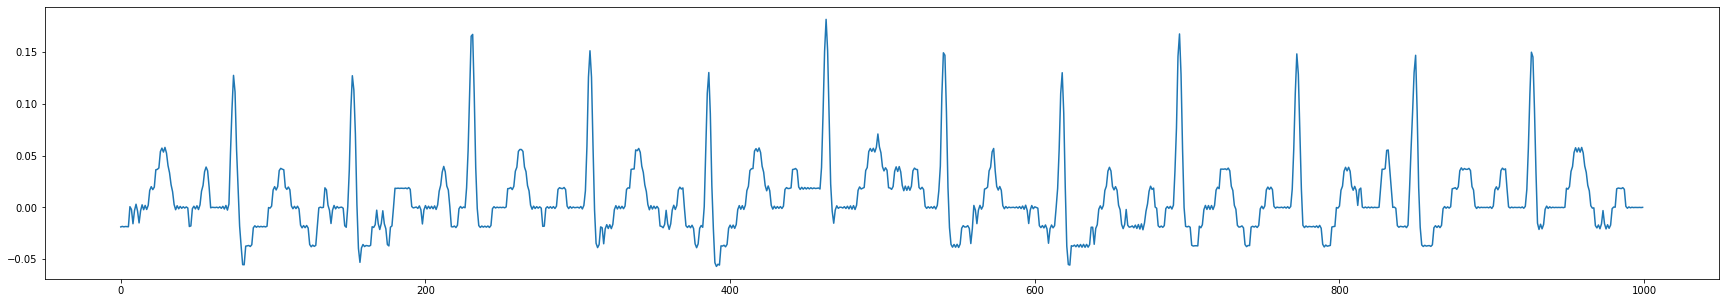

In [68]:
plt.figure(figsize=(30, 5))
plt.plot(signal)

b, a = iirnotch(w0=60, Q=10, fs=fs)
a_signal = filtfilt(b, a, signal)

plt.figure(figsize=(30, 5))
plt.plot(a_signal)

Text(0.5, 1.0, 'Function: scipy.find_peaks')

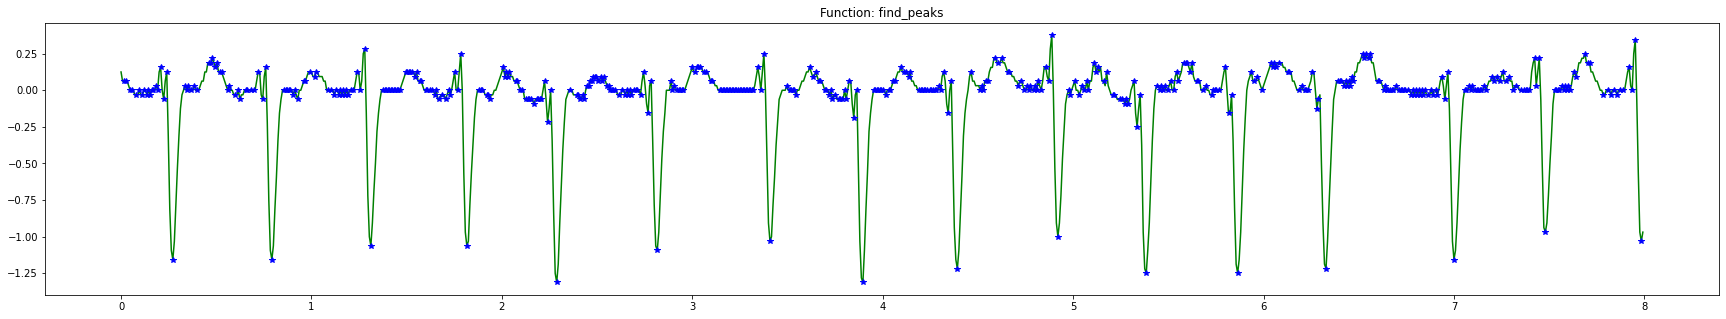

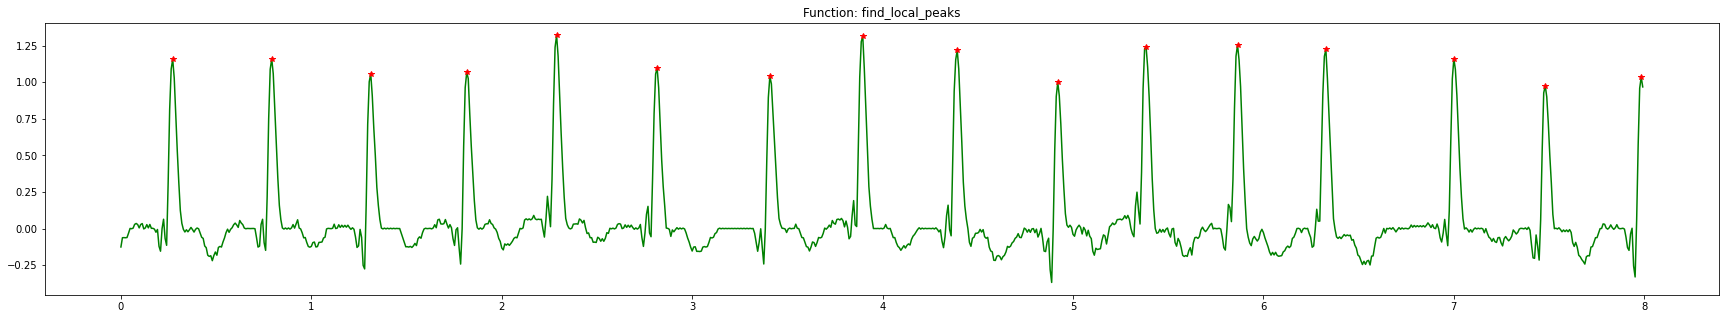

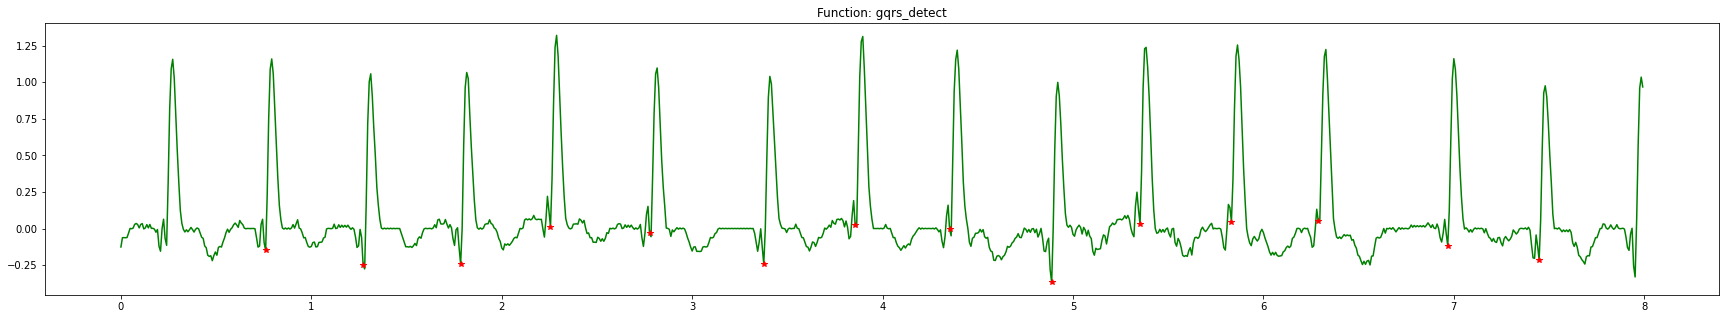

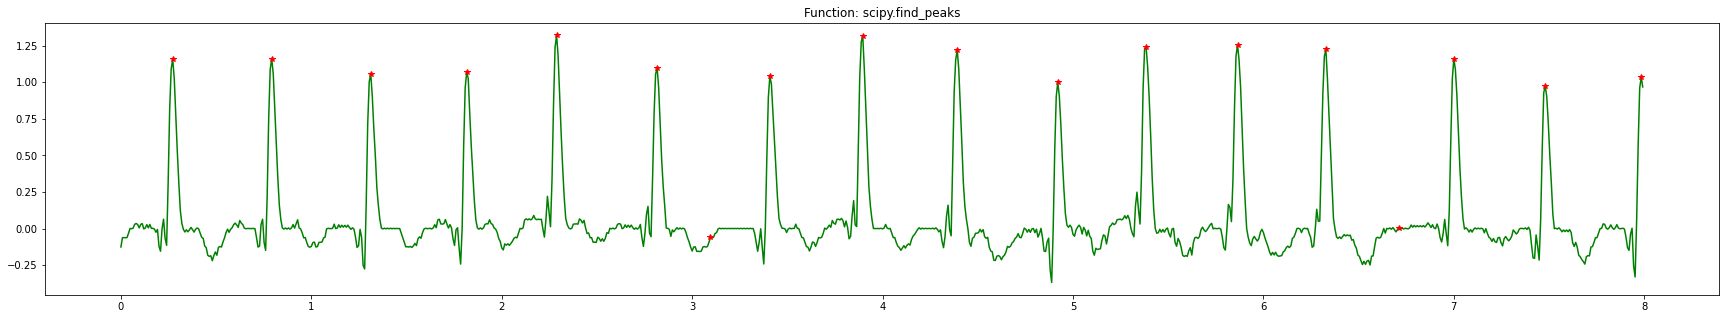

In [8]:
b_signal = -a_signal
a, b = processing.find_peaks(b_signal)
plt.figure(figsize=(30, 5))
plt.plot(x_data, signal, "g")
plt.plot(x_data[a], signal[a], "*b")
plt.plot(x_data[b], signal[b], "*r")
plt.title("Function: find_peaks")

a = processing.find_local_peaks(b_signal, int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 5))
plt.plot(x_data, b_signal, "g")
plt.plot(x_data[a], b_signal[a], "*r")
plt.title("Function: find_local_peaks")

a = processing.gqrs_detect(b_signal, fs)
plt.figure(figsize=(30, 5))
plt.plot(x_data, b_signal, "g")
plt.plot(x_data[a], b_signal[a], "*r")
plt.title("Function: gqrs_detect")

a, b = find_peaks(b_signal, distance=int((60/MAX_BPM)/(1/fs)))
plt.figure(figsize=(30, 5))
plt.plot(x_data, b_signal, "g")
plt.plot(x_data[a], b_signal[a], "*r")
plt.title("Function: scipy.find_peaks")

In [9]:
def peak_detection(signal, fs, mode="pos"):
    MIN_BPM, MAX_BPM = 40, 220
    if mode == "pos":
        "Registro de picos superiores"
        peaks = find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)), prominence=0.8)[0]
        if (len(signal)*(1/fs)/60)*MIN_BPM > len(peaks):
            return find_peaks(signal, distance=int((60/MAX_BPM)/(1/fs)), height=max(signal)*0.4)[0]
        return peaks
    elif mode == "neg":
        "Registro de picos inferiores"
        n_peaks = find_peaks(signal*(-1), distance=int((60/MAX_BPM)/(1/fs)), prominence=0.8)[0]
        if (len(signal)*(1/fs)/60)*MIN_BPM > len(n_peaks):
            return find_peaks(signal*(-1), distance=int((60/MAX_BPM)/(1/fs)), height=max(signal)*0.4)[0]
        return n_peaks

def signal_processing(raw_signal, fs):
    MIN_BPM, MAX_BPM = 40, 220
    
    b, a = iirnotch(w0=60, Q=1.5, fs=fs)
    signal = filtfilt(b, a, raw_signal)
    # Restado de la media de la señal
    sig_prom = smoother(signal, window=int(((60*fs)/MAX_BPM)))
    sig_prom = smoother(sig_prom, window=int(((60*fs)/MAX_BPM)*2), repeat=5)
    signal = signal - sig_prom
    # Obtención de picos inferiores y superiores
    peaks = np.array(peak_detection(signal, fs))
    n_peaks = np.array(peak_detection(signal, fs, "neg"))
    time_axis = np.array(range(len(signal)))*(1/fs)
    
    return signal, sig_prom, peaks, n_peaks, time_axis
    
    
def display_signals(record, channel, sample=1500):
    """
        Despliega las señales con sus picos encontrados para seleccionar la óptima
    """
    fig, axs = plt.subplots(1, 1, figsize=(30, 5), num=1)
    signal = record[channel][:sample]
    signal, sig_prom, peaks, n_peaks, time_axis = signal_processing(signal, record.fs)

    # Ploteo de todo en la figura
    axs.set_title(f"Record: {record.case}/{record.name}: #{record.slen} - {channel}")
    axs.plot(time_axis, signal, "g")
    axs.plot(time_axis, sig_prom, "b")
    axs.plot(peaks*(1/fs), signal[peaks], "*r")
    axs.plot(n_peaks*(1/fs), signal[n_peaks], "*b")

    plt.show()

In [10]:
Record = CASES[0][0]

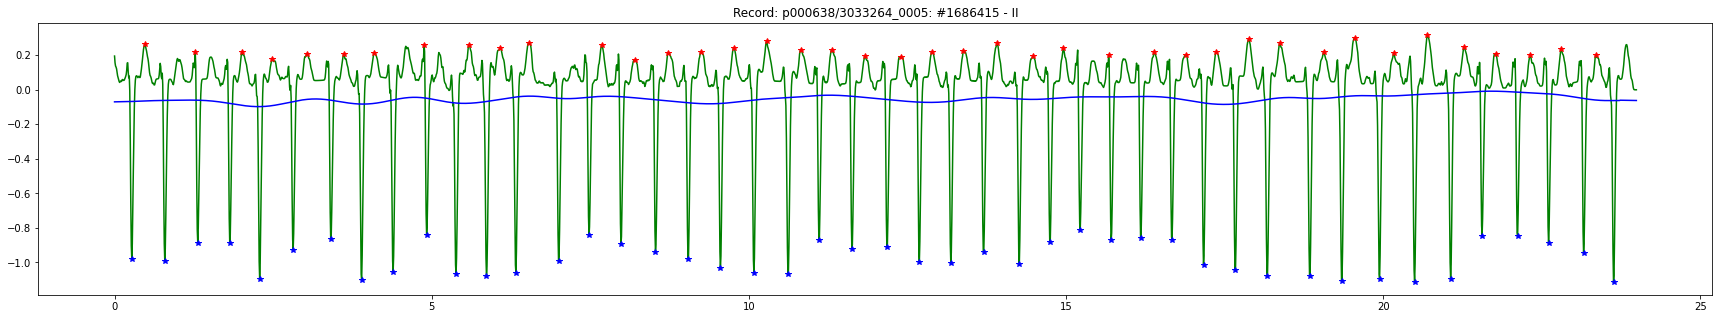

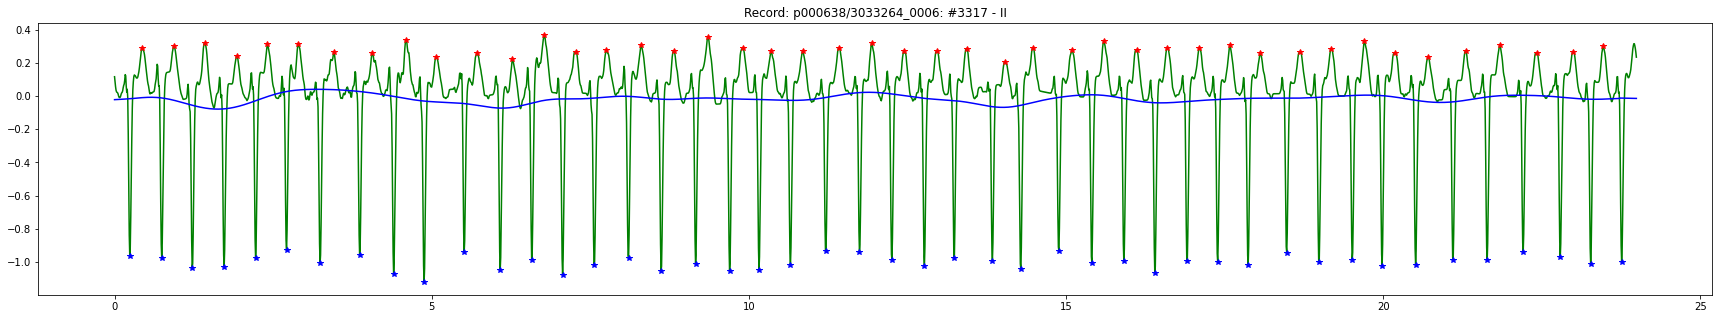

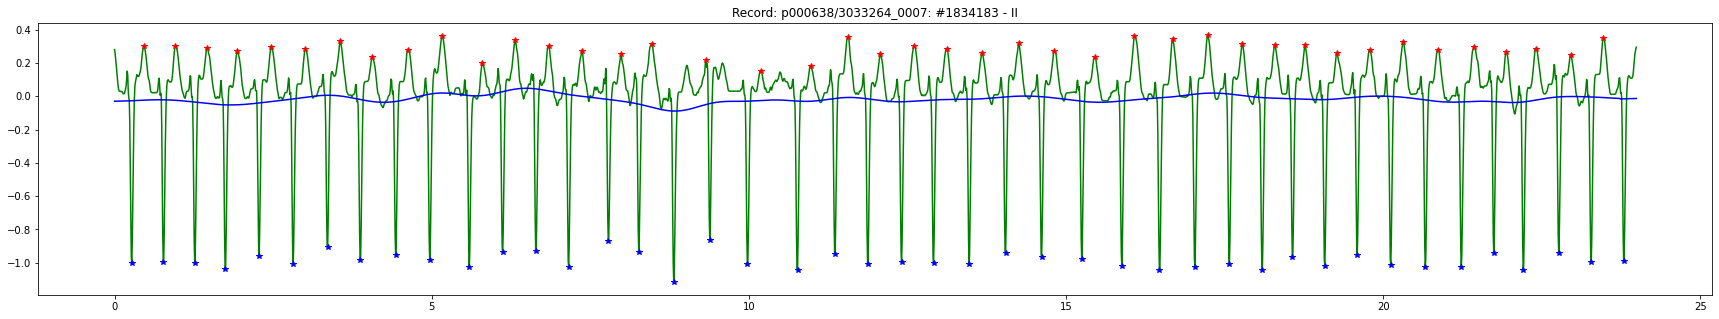

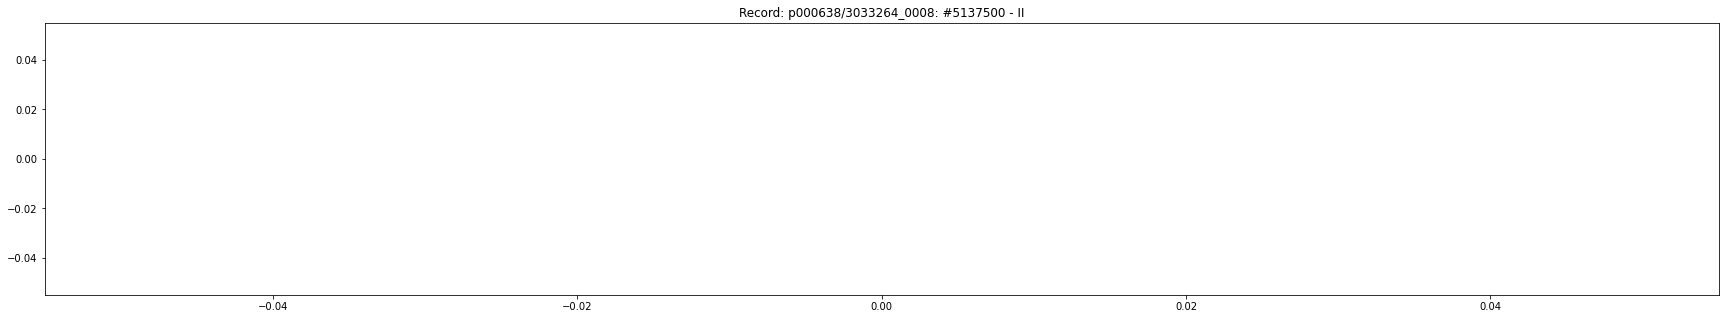

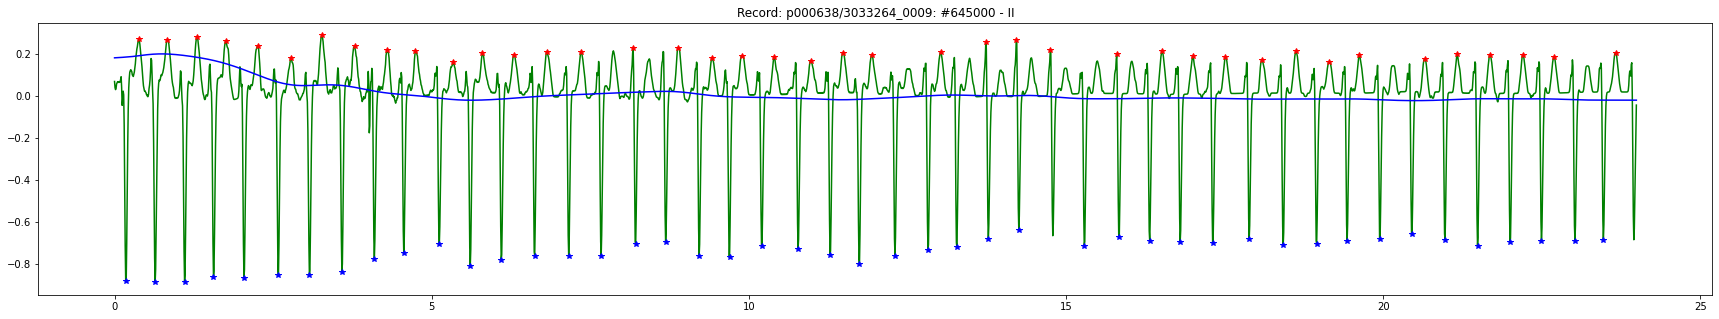

In [11]:
case = CASES[0]
for record in case:
    display_signals(record, "II", 3000)

In [12]:
record.sig_names

['II']

In [13]:
r = CASES[0][3]
print(r)
signal_processing(r["II"][:1500], r.fs)

	 Record: 3033264_0008, Length:5137500, 	# of signals: 2 -> ['II', 'ABP']


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([0.0000e+00, 8.0000e-03, 1.6000e-02, ..., 1.1976e+01, 1.1984e+01,
        1.1992e+01]))

In [56]:
def get_peaks(raw_signal, fs):
    MAX_BPM = 220
    raw_peaks, _ = find_peaks(raw_signal, distance=int((60/MAX_BPM)/(1/fs)))
    med_peaks = processing.correct_peaks(raw_signal, raw_peaks, 30, 35, peak_dir='up')
    wel_peaks = processing.correct_peaks(raw_signal, med_peaks, 30, 35, peak_dir='up')
    return wel_peaks

def display_signals(record: Record, channel: str, sample: int=1500):
    signal = record[channel][:sample]
    signal = signal[~(np.isnan(signal))]
    peaks = get_peaks(signal, record.fs)
    time = np.arange(len(signal))/record.fs

    plt.figure(figsize=(20, 4))
    plt.title(f"Record: {record.case}/{record.name}: #{record.slen} - {channel}")
    plt.plot(time, signal)
    plt.plot(time[peaks], signal[peaks], "*r")
    plt.show()

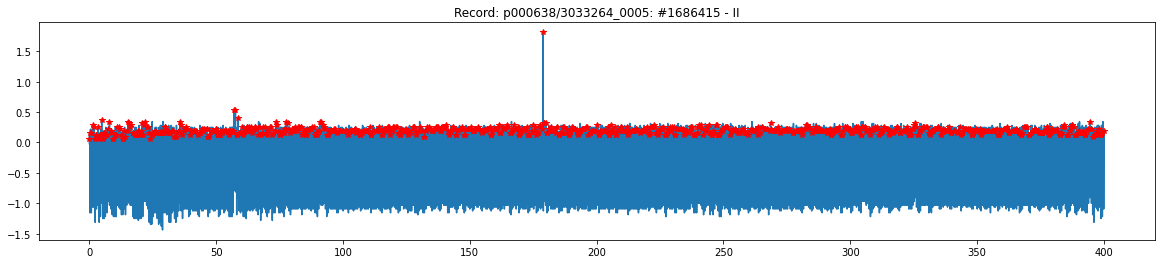

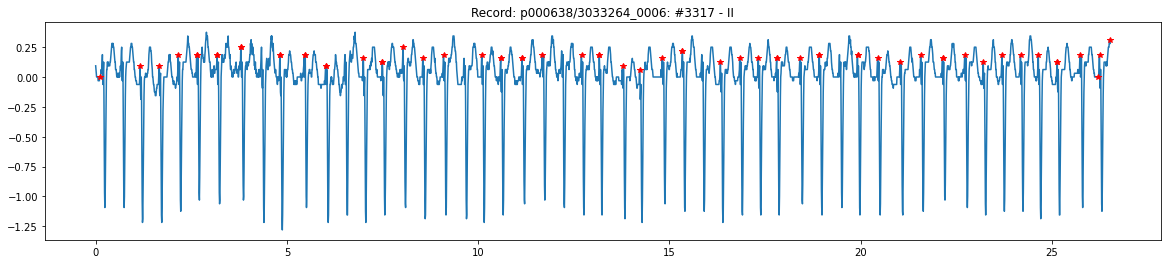

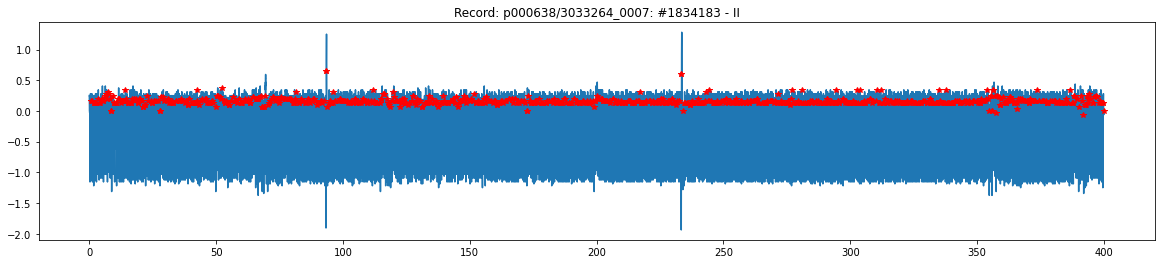

In [73]:
case = CASES[0]
for record in case[:3]:
    display_signals(record, "II", 50000)

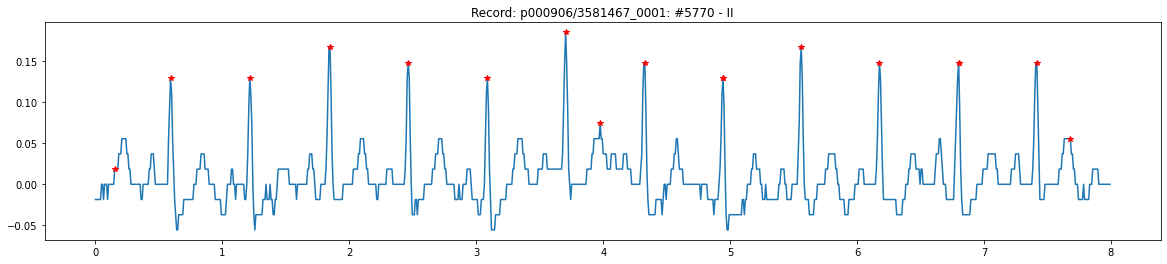

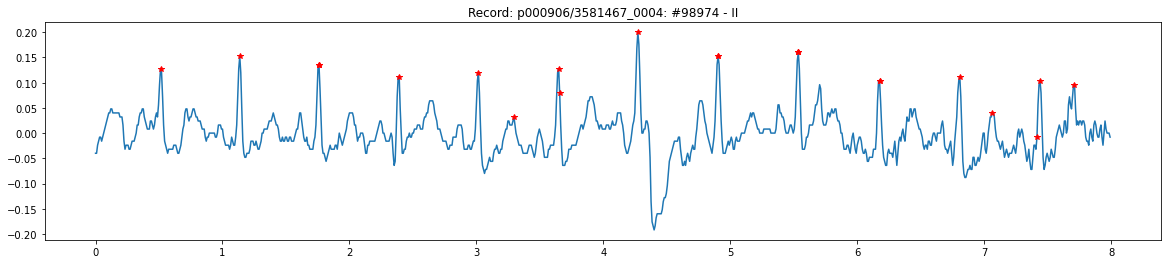

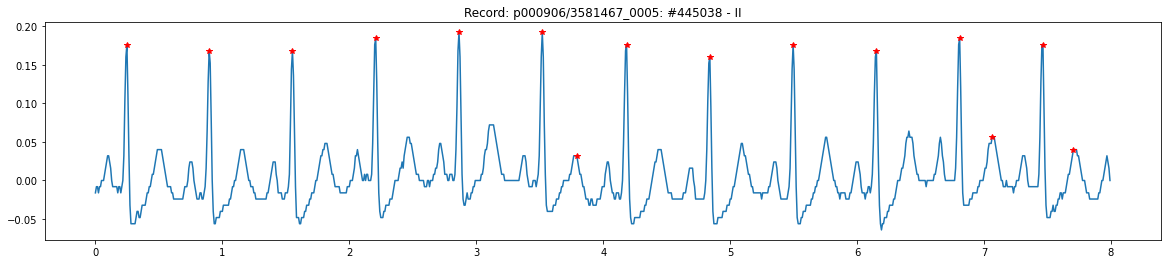

In [74]:
case = CASES[5]
for record in case[:3]:
    display_signals(record, "II", 1000)

In [43]:
r.fs

125

AttributeError: 'Case' object has no attribute '_linear_analysis'

In [9]:
l = [1, 2, 3, 4, 1,4 , 2, 3, 1, 4 ,6, 2,3, 2,2, 7, 2, 5]

In [13]:
from collections import Counter
Counter(l).most_common()

[(2, 6), (1, 3), (3, 3), (4, 3), (6, 1), (7, 1), (5, 1)]

In [15]:
help(Counter.most_common)

Help on function most_common in module collections:

most_common(self, n=None)
    List the n most common elements and their counts from the most
    common to the least.  If n is None, then list all element counts.
    
    >>> Counter('abracadabra').most_common(3)
    [('a', 5), ('b', 2), ('r', 2)]

